In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#import data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,5.135798
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,4.087656
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,5.109575
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,4.553877
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,5.129899
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,5.198497
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0,5.111988
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,4.727388
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0,4.906755


In [ ]:
#tentukan data understanding
print("Data Shape : ", df.shape)

Data Shape :  (768, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
 9   Insulin_log               768 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


In [ ]:
df[['Pregnancies', 'BloodPressure', 'Age', 'BMI']].describe()

,Pregnancies,BloodPressure,Age,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,72.371354,33.240885,32.427344
std,3.369578,12.206417,11.760232,6.886588
min,0.000000,24.000000,21.000000,18.200000
25%,1.000000,64.000000,24.000000,27.500000
50%,3.000000,72.000000,29.000000,32.090000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0.0,500
1.0,268


In [ ]:
#cleaning data
df.isnull().sum()
#data value tidak kosong

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Insulin_log,0


In [ ]:
#mencari nilai duplikasi
df.duplicated().sum()

0

Eksplorasi data Analysis (EDA)

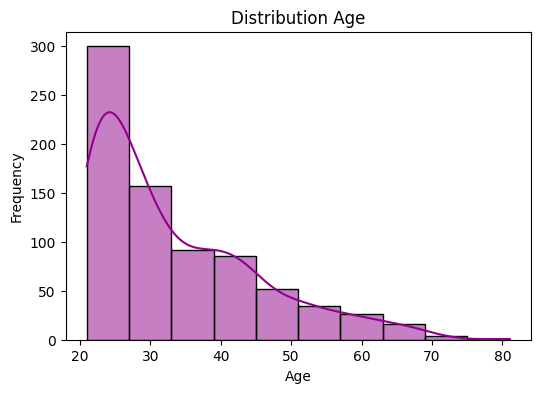

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='#91008a')

plt.title('Distribution Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

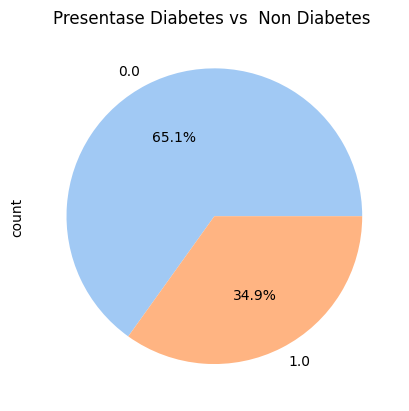

In [ ]:
#visualisasi hasil diagnosis
sns.set_palette('pastel')
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vs  Non Diabetes ')
plt.show()

<ipython-input-16-db5f3394092f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='rocket')


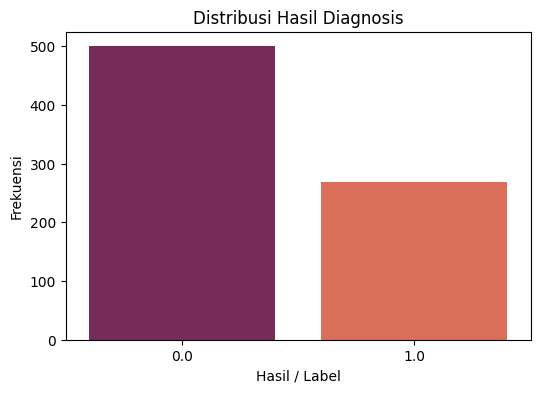

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette='rocket')
plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil / Label')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
#korelasi
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log
Pregnancies,1.000000,0.131230,0.218327,0.102406,0.092451,0.023323,-0.033523,0.544341,0.221898,0.125183
Glucose,0.131230,1.000000,0.233992,0.246807,0.674860,0.238457,0.139226,0.270115,0.495853,0.685863
BloodPressure,0.218327,0.233992,1.000000,0.230225,0.170923,0.294618,0.006323,0.337930,0.176665,0.188376
SkinThickness,0.102406,0.246807,0.230225,1.000000,0.269333,0.639370,0.113957,0.149474,0.279530,0.279555
Insulin,0.092451,0.674860,0.170923,0.269333,1.000000,0.275567,0.127453,0.279419,0.357160,0.959895
BMI,0.023323,0.238457,0.294618,0.639370,0.275567,1.000000,0.155259,0.029817,0.313882,0.286645
DiabetesPedigreeFunction,-0.033523,0.139226,0.006323,0.113957,0.127453,0.155259,1.000000,0.033561,0.173844,0.111407
Age,0.544341,0.270115,0.337930,0.149474,0.279419,0.029817,0.033561,1.000000,0.238356,0.310356
Outcome,0.221898,0.495853,0.176665,0.279530,0.357160,0.313882,0.173844,0.238356,1.000000,0.382434
Insulin_log,0.125183,0.685863,0.188376,0.279555,0.959895,0.286645,0.111407,0.310356,0.382434,1.000000


<Axes: >

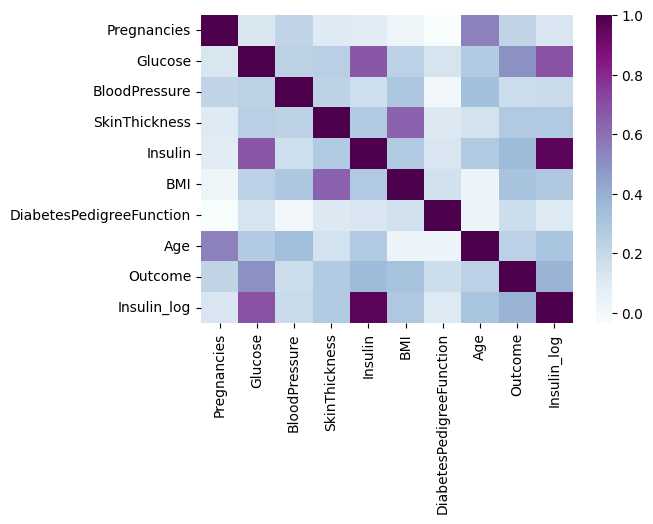

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')

In [ ]:
#preproseing data
x = df.drop(columns=['Outcome'])
y = df['Outcome']

print("x : ", x.shape)
print("y : ", y.shape)

x :  (768, 9)
y :  (768,)
